tenha uma amostra que represente os dados
aleatoria mantendo proporca orig

tenha uma amostra q represente algo que seja feiro no seu oc colocd em nuvem 

regularizacao evita um poucoo overfit
parametro de 

# Estrategia de treino e teste

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data_raw = pd.read_csv('train.csv')

In [ ]:
data_raw.columns

In [ ]:
factures = ['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
            'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
            'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
            'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
            'investe_exterior', 'pessoa_polit_exp']

label = ['limite_adicional']

# Treino e teste do modelo 

In [ ]:
Cor = ['Azul','Amarelo','Vermelho',]
Combustivel = ['Gasolina','Etanol','Disel']
Preco = [30000, 15000, 60000]
num_portas = [4, 0, 6]
tipo_veiculo = ['Carro', 'Moto', 'Onibus']

# Criar o dicionário com os dados
data = {
    'Cor': Cor,
    'Combustível': Combustivel,
    'Preço': Preco,
    'Número de Portas': num_portas,
    'Tipo de Veículo': tipo_veiculo
}



In [ ]:

# Criar o dataframe
df_original = pd.DataFrame(data)

# Definir a quantidade de linhas adicionais desejadas (50 - 3 = 47 linhas adicionais)
num_linhas_adicionais = 47

# Gerar cópias adicionais do dataframe original
new_df = pd.concat([df_original] * num_linhas_adicionais, ignore_index=True)

# Mostrar o dataframe com mais de 30 linhas
new_df.head(10)


In [ ]:
new_df.dtypes 

# Validacao Holdout

## Treinamento do joaquim

# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt

# Dados sinteticos

In [ ]:
# funcao boa para fazer alguns testes 

n_samples=20000
n_features=2
n_informative=2 # quantas represantam realmente o fenomono
n_redundant=0 # quantas relacionadas eu teria 
random_state=0 # poderia ser o defalt

# me retorna x , y  conj de rtreino eas fctures e os rotulos
X, y = ds.make_classification( n_samples=n_samples,# N de amostras 
                               n_features=n_features,# N de fectures col do dataset
                               n_informative=n_informative, # fectures informativa
                               n_redundant=n_redundant,# fectures redundantes, auto corre ou muito corr
                               random_state=random_state)# cid de aleatoriedadde, td vz q rod vir o msm result


# production dataset
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size = 0.2, random_state=random_state)# test size 0,2 = 20% randon manter a aleatoriedd

# Se;arados 20% do meu conjunto, ele fica guardado em X+prod e y_prod e os outros 80%

In [ ]:
df = pd.DataFrame(X)
print(df.shape)
print()
print(df.head())
print()
print(type(X))

# Nao há separacao de dados

In [ ]:
# modelo bem simplees de arv de decisao , com nde fecture = 2 para que seja tao complexo a ponto da arvr nao consegui ajustar os pontos
# parametro importan max_depth quantidad que eu permito que minha arvore cresça
# quais os paramentros que fazem o alg ter um underfit ou overfit o max_depth é um dos que overfit da arvr

#Define model
model = tr.DecisionTreeClassifier( max_depth=38)
model.fit(X, y)

# Classification sobre os dados de treinamento 
yhat = model.predict(X)
acc = mt.accuracy_score( y, yhat)

print('Accuracy Over Traning : {}'.format(acc))

# Publicacao do Modelo em Producao

In [ ]:
yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Acuraccy Over Production: {}'.format(acc_prod))

# Estrategia de Treino-Teste

In [ ]:
# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = ms.train_test_split( X , y, test_size=0.2, random_state=random_state)

In [ ]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train, y_train)

# Classificacao sobre os dados de teste
yhat_test = model.predict(X_test)
# Calcular a accuracy
acc_test = mt.accuracy_score( y_test, yhat_test)

print('Accuracy Over Test: {}'.format( acc_test))
 
# forma de metrificar o aprendizado para dados que ele nunca viu 

In [ ]:
from matplotlib import pyplot as plt

# Escolhendo os Parametros do algoritimo


In [ ]:
# Algoritimo de GridSarch ganacia testa tudo contra tudo  essa metrica e so para exemplificar

# Criar uuma variavel, valueas nesse cria um for  1 a 60 esse vl popul values criar dentro de uma lista faco lista de compra rancho

values = [ i for i in range( 1, 60 )]

test_score = list()
for i in values:
    tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    
    # Classificacao sobre o test
    yhat_test = model.predict(X_test)
    acc_test = mt.accuracy_score(y_test, yhat_test)
    
    test_score.append(acc_test)
    

In [ ]:
plt.plot(values, test_score, '-o', label='Test')

# Publicando o modelo em producao

In [ ]:
model_last = tr.DecisionTreeClassifier( max_depth=34)
model_last.fit(np.concatenate( (X_train, X_test) ),
               np.concatenate( (y_train, y_test) ) )

# Classificacao sobre os dados de producao
yhat_pred = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Accuracy Over Preduction: {}'.format( acc_prod ) )




# 2.0 Estrategia de Treino Test e Validacao

Total (100%) -> Treino (80%) e Teste (20%)

Treino (80%) -> Treino (60%) e Validacao (20%)

Treino (60%), Validacao (20%), Teste (20%)

~ Modelo -> Treino
-  > Treinar o algoritmo
-  > Validacao -> Encontrar o melhor parametro

Treino (60%) + Validacao (20%) -> Treino (80)

Modelo + Melhor Parametro + Treino (80%) -> Treino Last

Modelo Last -> Teste (20%) -> Performance de Generalizacao

Treino (Treino + validacao ) + Teste -> Producao

# O Problema de Overfiting na Classificacao

In [ ]:
# 1.0 Treinamento como o Joaquim: O DS Novato
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples,
                               n_features=n_features,
                               n_informative=n_informative, 
                               n_redundant=n_redundant,
                               random_state=random_state)
                               
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )

In [ ]:
# ## Não há separação dos Dados

# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )

# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training: {}".format( acc ) )


In [ ]:
# ## Publicação do Modelo em Produção

# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )


In [ ]:
# # 2.0 Estratégia Treino-Validacao-Teste

# Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2,random_state=random_state ) 
# Separação entre Treino e Validacao
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=
0.2,random_state=random_state ) 



In [ ]:

# ## Escolha de parâmetros do algoritmo

# Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
train_scores, val_scores = list(), list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_train = model.predict( X_train )
    acc_train = mt.accuracy_score( y_train, yhat_train )
    
    train_scores.append( acc_train )
    # Previsão sobre os dados de test
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    val_scores.append( acc_val )


In [ ]:
# plot of train and test scores vs tree depth
plt.plot( values, train_scores, '-o', label='Train' )
plt.plot( values, val_scores,  '-o', label='Validacao' )
plt.xlabel('Numero de Max Depth')
plt.legend()
plt.show()


- Azul treino 
- Laran teste

- Toda vez que inter no lup a acuracia sobre o treino era parecida  quando o n era pegueno era parecida quand chegano 9 a alg test era proximo do treino qnd chega no 9 ele overfita ele decora e so da 100 %

In [ ]:
# Roda sobre o treino

# Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=4 )
model_last.fit( X_train , y_train )

# Previsao em cima do ttreino

# Previsão sobre os dados de treinamento
yhat_train = model_last.predict( X_train )
acc_train = mt.accuracy_score( y_train, yhat_train )
print( "Accuracy Over Training: {}".format( acc_train ) )

# O msm algoritimo uma acuracia sobre a validacao

# Previsão sobre os dados de validacao
yhat_val = model_last.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validacao: {}".format( acc_val ) )

#Previsao em cima do teste sobre dados que ele nunca viu 

# Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Testing: {}".format( acc_test ) )

# meu Dado de Prod que simula minha producao

# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Producao: {}".format( acc_prod ) )


# Noa foi juntado terino e validacao para junta a alg final para ver como fica a acuaracia em cima do validadcao

1
# - Quando calcula a metrica do algoritimo em cima do treino ela sempre vai maior de todas pq mais uma vez o alg ja sabe o dado de treinammete porq ele foi usado para treinar o modelo e sempre vai ser o maior ele vai dar per to de 087
# nesse caso se olhar na curva  o parametro aqui e 4 e la o param 4 
# depois quando e treinado 

2
# depois qud treina sobre o daso de val essa perf vai ser uma pouc menor ppq ele nunvca nviu mais dp qie junta para treima ele ate o fial junta trei com vl para treina ele ate o final ai  ele ja bai ter usado o dado de val pata encontta o melhor param ai a gete ja vai ter vazado ele os dados para ele que ele vau fz a prev so qie o dad de tes q foi preparad la no comeco do proble e dado que garabte q eke le nunk viu entao quando fixser o a prev sobr eo dd de tet tem que ser um pouc menor q o dd de trein  ou de vailidadcao um pouco so menor que o dad de treim ou de val  puca coisa 

# generalizando e acertand mai ou meno o que ja fazuia em test

# olha o tets treinamento e prod v se estao proximo o tet tem q repre o dados de produc 



# O Problema do Overfiting na Regressao

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import model_selection as ms
import math

# 1.0 Syntatic Regrasion Data

In [8]:
def hidden_law(x):
    return math.sin(2 * math.pi * x)

# Aqui, você importou os módulos math e numpy. A função hidden_law(x) é definida para calcular o seno de 2π multiplicado por x. No entanto, essa função é definida apenas para um valor escalar x e não funciona diretamente com arrays.


In [9]:
hidden_law_vectorized = np.vectorize(lambda x: math.sin(2 * math.pi * x))
#Você cria uma versão vetorizada da função hidden_law usando np.vectorize. Isso permite que a função seja aplicada a cada elemento de um array, em vez de apenas a um único valor escalar.


In [10]:
x_all = np.arange(0, 1, 0.01)
# Aqui, você cria um array x_all usando a função np.arange. Ele contém valores de 0 a 0.99 (não incluindo 1) com um passo de 0.01. Isso criará um array de valores que você usará como entrada para a função hidden_law.


In [11]:
y_hidden = hidden_law_vectorized(x_all)
# Você aplica a função hidden_law_vectorized ao array x_all. Isso significa que para cada elemento x em x_all, a função hidden_law será aplicada, calculando o valor do seno de 2π multiplicado por esse elemento x. Os resultados são armazenados em y_hidden, criando um array de valores de seno correspondentes.

# Em resumo, esse código cria um array de valores de entrada x_all, aplica a função seno vetorizada hidden_law_vectorized a cada valor de x_all e armazena os resultados em y_hidden, fornecendo assim uma representação do comportamento da função seno no intervalo de 0 a 0.99.

NameError: name 'x' is not defined

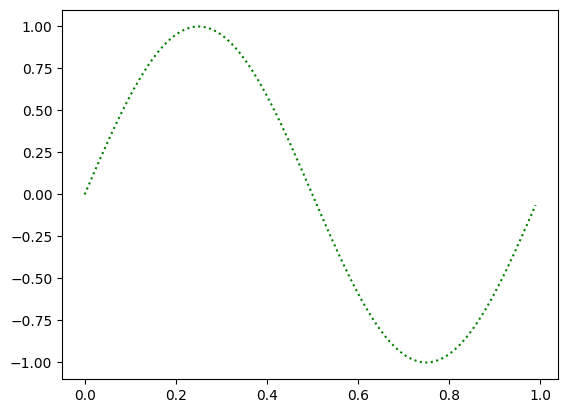

In [6]:

plt.plot( x_all, y_hidden, ':g')
plt.plot(x, y, '.')

In [12]:
np.random.seed( 42 )
noise = 0.2
samples = 20

# Dataset

x= np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise*np.random.randn( samples )

# Split training and test dataset
X_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.3)


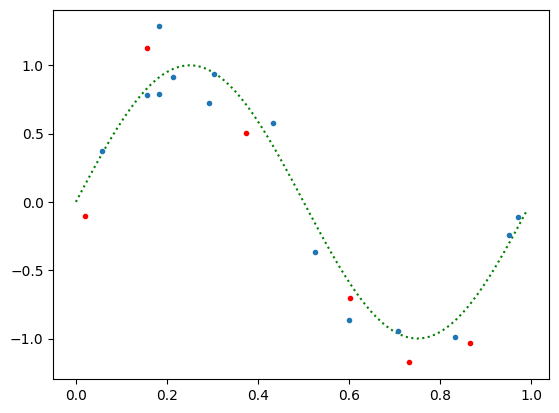

In [13]:
plt.plot(x_all, y_hidden, ':g' )# fonte geradora/Fenomeno tentando modelar
plt.plot( X_train, y_train, '.' )
plt.plot( x_val, y_val, 'r.' )

Claro, vou explicar o código passo a passo:
# =======
np.random.seed(42)
np.random.seed(42) define a semente para o gerador de números aleatórios do NumPy. Isso garante que a sequência de números aleatórios gerada seja a mesma sempre que o código for executado, o que é útil para fins de reprodutibilidade. O número "42" é apenas um valor arbitrário escolhido como semente.
# =======
noise = 2.0
samples = 20
Você definiu duas variáveis: noise (ruído) e samples (amostras). noise é definido como 2.0, o que significa que será adicionado um ruído aleatório com distribuição normal (gaussiana) com desvio padrão de 2.0. samples é definido como 20, indicando que haverá 20 amostras de dados.
# =======
x = np.random.rand(samples)
x é um array gerado aleatoriamente usando a função np.random.rand(samples). Ele contém 20 valores de ponto flutuante entre 0 e 1. Isso cria um conjunto de amostras de entrada x.
# =======
y = np.sin(2 * np.pi * x) + noise * np.random.randn(samples)
y é calculado aplicando a função seno (sinusoidal) à sequência x. Isso cria um conjunto de valores y correspondentes à função seno 2πx. Além disso, o termo noise * np.random.randn(samples) é adicionado a esses valores y, introduzindo ruído gaussiano aleatório. Isso simula um cenário onde os dados observados não são exatamente perfeitos, mas possuem algum nível de variação.
# =======
plt.plot(x_all, y_hidden, ':g')
plt.plot(x, y, '.')
Duas visualizações de gráfico estão sendo criadas aqui. A primeira linha plota a função seno teórica representada pelos valores x_all e y_hidden (calculados anteriormente). O formato ':g' define a linha como tracejada (com dois pontos) e verde (g é a abreviação de verde em matplotlib).

A segunda linha plota as amostras geradas, representadas por pontos ('.') no gráfico. Essas amostras são representadas pelos valores x (entrada) e y (saída) calculados com adição de ruído.

Em resumo, esse código gera dados de amostra aleatórios de uma função seno com adição de ruído, em seguida, cria um gráfico que exibe a função seno teórica (linha tracejada verde) e as amostras observadas (pontos). Isso ajuda a visualizar como os dados observados se comparam à função seno teórica, levando em consideração o ruído adicionado.

# Treinamento

In [14]:

# quantos graus eu quero variar 
max_poly_degree = 14
poly_degree = range(max_poly_degree) 

# criado para gurada o valor
polys = []
for p in max_degree:# para cada p vou treina minha regressao polinomeal
    poly_model = np.polyfit(X_train, y_train, p)# (VL do grau do polinomeo)O grau do meu polinomio,parameytro q varia a te o fenomino acontecer  analogo a pr
    polys.append(poly_model) # a cada psicao da minha lista é guardado um modelo tteinado que e o param treinado que sera feito para overfita
    
    

NameError: name 'max_degree' is not defined

In [ ]:
# Caucula os erros


# Criar uma lista de zeros com o msm ta,anho dos degree
rmse_train = np.zeros(max_poly_degree)# cada 0 sub pel erro msf  treinado com seus resopect vl d
rmse_val = np.zeros(max_poly_degree)

for p in poly_degree: # para cada p de degree
    #predct over training dataset
    yhat_train = np.polyval( polys[p], X_train)# primeiro alg trein a com grau =1 # avl mei mod treinado com o os dados de treino 
    rmse_train[p] = np.sqrt(np.mean(np.square( (yhat_train - y_train))))# erro qyuadratico tiro a media faco a raiz quadrada
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val)
    rmse_val[p] = np.sqrt(np.mean(np.square( (yhat_val - y_val))))
# valor do erro para aquele polinome treinamdo para o erro = 14  

In [ ]:
rmse_train

In [ ]:
rmse_val

In [ ]:
plt.plot( poly_degree, rmse_train, 'b')
plt.plot( poly_degree, rmse_val, 'r')
plt.axis((0, max_poly_degree-1, 0, 10)) # y de 0 a 10
plt.legend(['Traning', 'Validation'])

In [ ]:
plt.figure(figsize=(15, 9))
for p in poly_degree:
    plt.subplot(3, 5, p+1 )
    
    y_pol = np.polyval( polys[p], x_all)
    plt.plot(x_all, y_hidden, 'g')
    plt.plot(X_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot(x_all, y_pol, 'b')
    plt.title( poly_degree)
    plt.axis((0, 1, -1.5, 1.5))
    
    

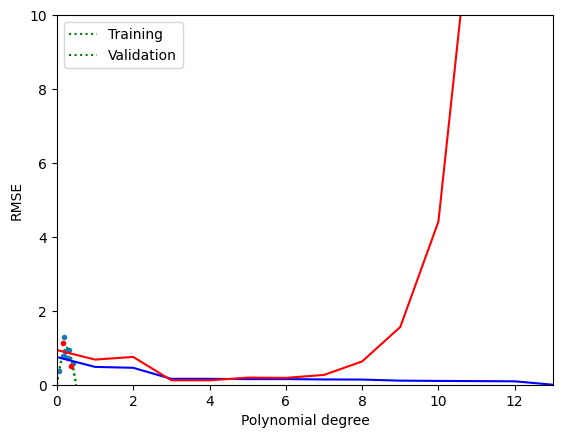

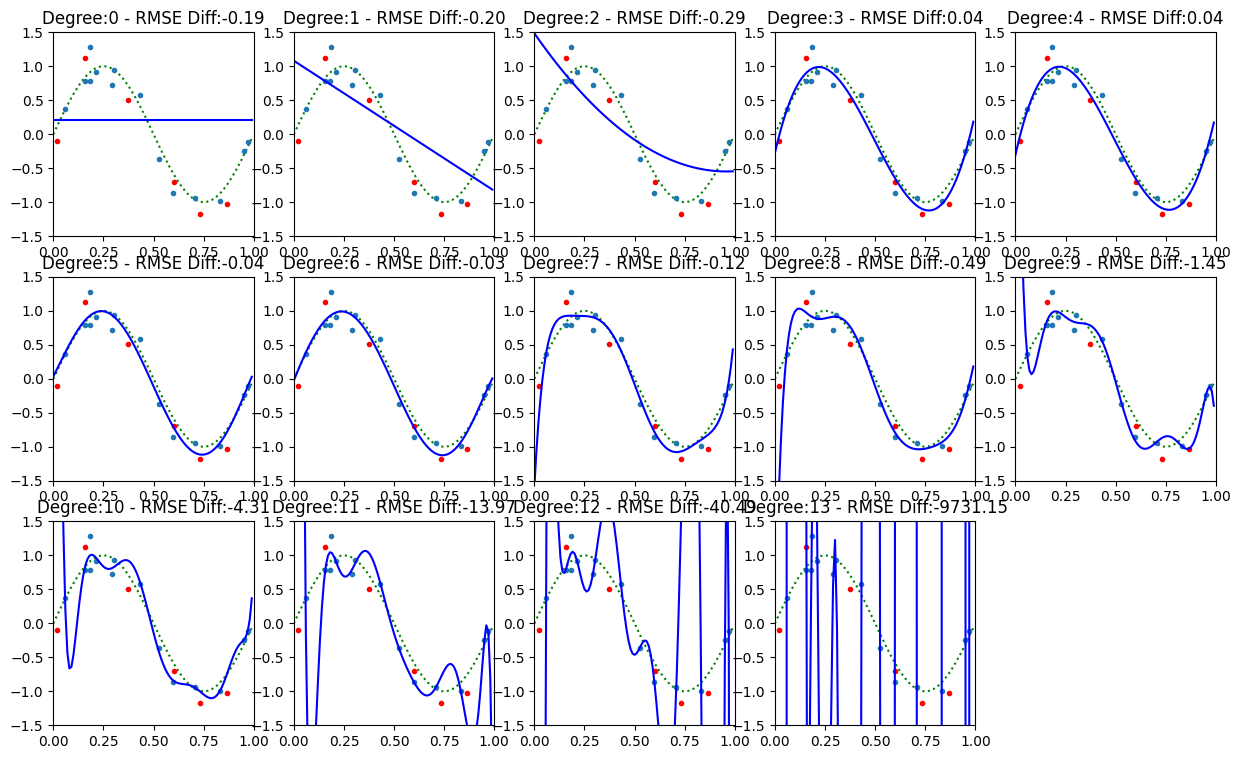

In [18]:
# # 0.0 Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
# # 1.0 Synthetic regression dataset
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x))  # made to run on vecto
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all, y_hidden, ':g');
np.random.seed(42)  # to make repeatable
noise = 0.2
samples = 20
# dataset
x = np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise*np.random.randn( samples )
# split training and test dataset
x_train, x_valid, y_train, y_valid = ms.train_test_split( x, y, test_size=0.3 )
plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_valid, y_valid, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation']);
# ## Treinamento
max_poly_degree = 14
poly_degrees = range(max_poly_degree)
polys = []
for p in poly_degrees:
    poly_model = np.polyfit( x_train, y_train, p )
    polys.append( poly_model )
rmse_train = np.zeros( max_poly_degree )
rmse_val = np.zeros( max_poly_degree)
for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt( np.mean( np.square( yhat_train - y_train ) ) )
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val )
    rmse_val[p] = np.sqrt( np.mean( np.square( yhat_val - y_val ) ) )
plt.plot( poly_degrees, rmse_train, 'b' )
plt.plot( poly_degrees, rmse_val, 'r' )
plt.axis( ( 0, max_poly_degree-1, 0, 10 ) )
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');
plt.figure(figsize=(20, 15))
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    
    plt.plot(x_val, y_val, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title('Degree:{} - RMSE Diff:{:.2f}'.format(p, rmse_train[p] - rmse_val[p]))
    plt.axis((0, 1, -1.5, 1.5))